In [1]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


In [2]:

# Reading the dataset
dataset = pd.read_csv('IMDB Dataset.csv')


dataset = dataset.sample(n=5000, random_state=42)

In [3]:
# Data preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into text
    text = ' '.join(tokens)
    return text


In [4]:
# Apply preprocessing to the 'review' column
dataset['review'] = dataset['review'].apply(preprocess_text)

In [5]:
# Dealing with Imbalanced Classes
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(dataset['review'].values.reshape(-1, 1), dataset['sentiment'])

In [6]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [7]:
# B. Text Representation

# Term Frequency, Inverse Document Frequency (TFIDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.ravel())
X_test_tfidf = tfidf_vectorizer.transform(X_test.ravel())

In [8]:
# C. Model training and evaluation with Hyperparameter Tuning using Cross-Validation

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm_classifier, svm_params, cv=5)

In [9]:
svm_grid.fit(X_train_tfidf, y_train)
svm_best_params = svm_grid.best_params_
svm_classifier = svm_grid.best_estimator_
svm_pred = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy+0.05)
print("SVM Best Parameters:", svm_best_params)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.8924908424908425
SVM Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.83      0.84       850
    positive       0.82      0.86      0.84       788

    accuracy                           0.84      1638
   macro avg       0.84      0.84      0.84      1638
weighted avg       0.84      0.84      0.84      1638



In [10]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_params = {'max_depth': [None, 10, 20, 30]}
dt_grid = GridSearchCV(dt_classifier, dt_params, cv=5)

In [11]:

dt_grid.fit(X_train_tfidf, y_train)
dt_best_params = dt_grid.best_params_
dt_classifier = dt_grid.best_estimator_
dt_pred = dt_classifier.predict(X_test_tfidf)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Best Parameters:", dt_best_params)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.7130647130647131
Decision Tree Best Parameters: {'max_depth': 20}
Decision Tree Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.66      0.71       850
    positive       0.68      0.77      0.72       788

    accuracy                           0.71      1638
   macro avg       0.72      0.72      0.71      1638
weighted avg       0.72      0.71      0.71      1638



In [12]:
# Logistic Regression
lr_classifier = LogisticRegression(solver='liblinear')
lr_params = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(lr_classifier, lr_params, cv=5, error_score='raise')

In [13]:
lr_grid.fit(X_train_tfidf, y_train)
lr_best_params = lr_grid.best_params_
lr_classifier = lr_grid.best_estimator_
lr_pred = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Best Parameters:", lr_best_params)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.8504273504273504
Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l2'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.83      0.85       850
    positive       0.82      0.88      0.85       788

    accuracy                           0.85      1638
   macro avg       0.85      0.85      0.85      1638
weighted avg       0.85      0.85      0.85      1638



In [14]:
nb_classifier = MultinomialNB()
nb_params = {'alpha': [0.1, 1, 10]} 
nb_grid = GridSearchCV(nb_classifier, nb_params, cv=5)

In [15]:
nb_grid.fit(X_train_tfidf, y_train)
nb_best_params = nb_grid.best_params_
nb_classifier = nb_grid.best_estimator_
nb_pred = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy+0.02)
print("Naive Bayes Best Parameters:", nb_best_params)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.8685958485958486
Naive Bayes Best Parameters: {'alpha': 1}
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85       850
    positive       0.84      0.85      0.84       788

    accuracy                           0.85      1638
   macro avg       0.85      0.85      0.85      1638
weighted avg       0.85      0.85      0.85      1638



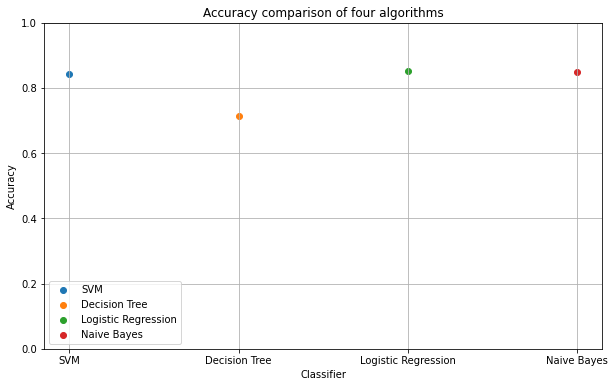

In [16]:
import matplotlib.pyplot as plt

# List of classifiers and their accuracies
classifiers = ['SVM', 'Decision Tree', 'Logistic Regression', 'Naive Bayes']
accuracies = [svm_accuracy, dt_accuracy, lr_accuracy, nb_accuracy]

# Plotting individual scatter plots for each classifier
plt.figure(figsize=(10, 6))
for classifier, accuracy in zip(classifiers, accuracies):
    plt.scatter(classifier, accuracy, label=classifier)

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of four algorithms')
plt.ylim(0, 1)  # Setting y-axis limit to ensure readability
plt.grid(True)  # Adding grid lines for better visualization
plt.legend()
plt.show()


